### Dataset

In [1]:
# SMSSpamCollection
# Location: https://mitu.co.in/dataset

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read file

In [3]:
df= pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df.loc[3,'text']

'U dun say so early hor... U c already then say...'

#### Seperate input and output data

In [6]:
#input 
x= df['text']

#output
y= df['label']

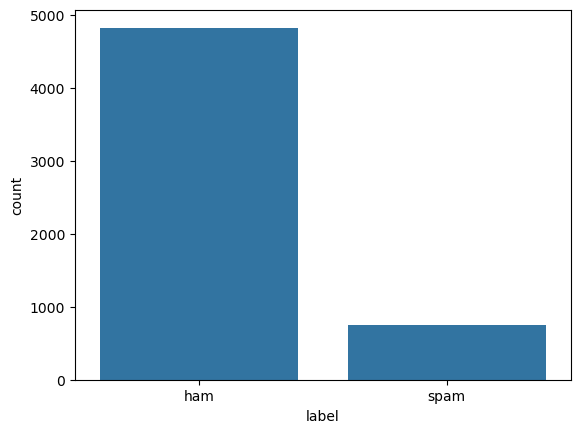

In [7]:
#Countplot
sns.countplot(x=y);

In [8]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x1b1c852ea90>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

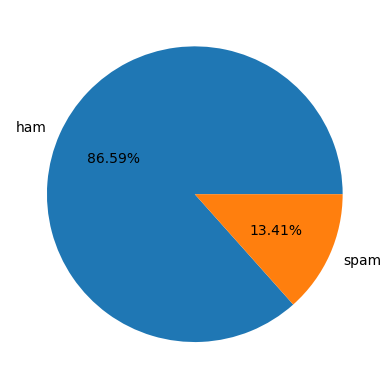

In [9]:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct='%2.2f%%')

In [10]:
pip install pip -U

In [11]:
pip install pillow wordcloud -U

## Filtered spam and not spam

In [12]:
spam=x[y=='spam']
not_spam= x[y=='ham']

In [13]:
spam.shape

(747,)

In [14]:
not_spam.shape

(4825,)

In [15]:
#spam.str.cat(sep=' ')
spam=' '.join(spam)
not_spam=' '.join(not_spam)

In [16]:
from wordcloud import WordCloud

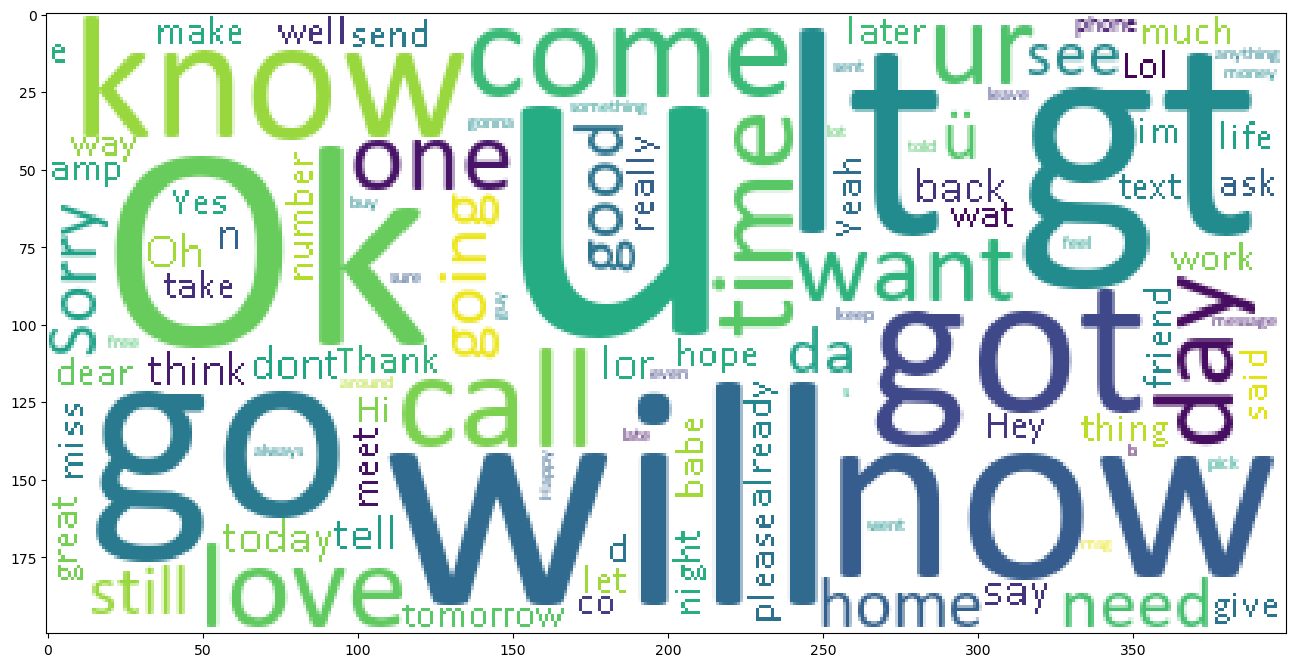

In [17]:
wc_notspam= WordCloud(font_path='calibri.ttf',
              background_color='white',
             max_words=100).generate(not_spam)
plt.figure(figsize=(16,9))
plt.imshow(wc_notspam)

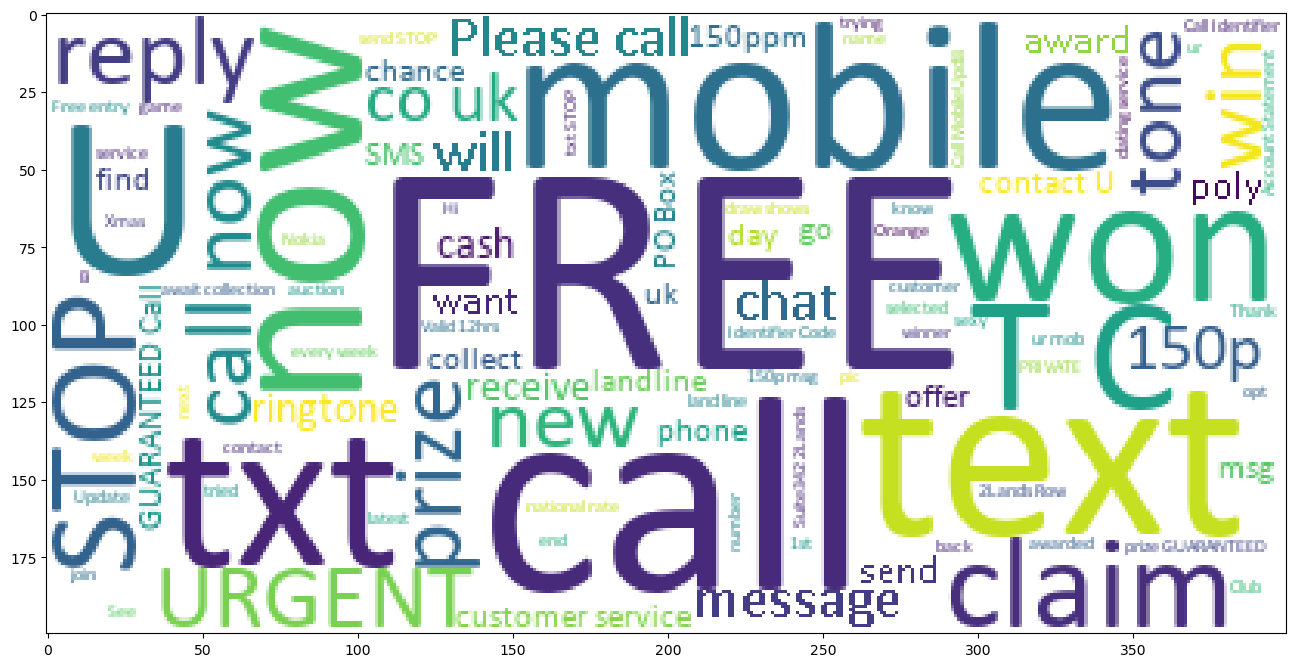

In [18]:
wc_spam= WordCloud(font_path='calibri.ttf',
              background_color='white',
             max_words=100).generate(spam)
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

In [19]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.59,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'Orang

### Prepare the data

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [21]:
sent= 'Hello friends! How are you? I like Python Programming'

In [22]:
#Tokenize the text
tokens1= word_tokenize(sent)

In [23]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming']

In [24]:
## 2. Remove the punctuations
tokens2= [token for token in tokens1 if token.isalnum()]

In [25]:
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [26]:
##3. Remove the stop words
swords= stopwords.words('english')

In [27]:
tokens3= [token for token in tokens2 if token.lower() not in swords]

In [28]:
tokens3

['Hello', 'friends', 'like', 'Python', 'Programming']

In [29]:
##4. remove the suffixes
ps= PorterStemmer()
tokens4=[ps.stem(token) for token in tokens3]
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [30]:
# define analyzer function
def clean_txt(sent):
    #Tokenize the text
    tokens1= word_tokenize(sent)
    ## 2. Remove the punctuations
    tokens2= [token for token in tokens1 if token.isalnum()]
    ##3. Remove the stop words
    tokens3= [token for token in tokens2 if token.lower() not in swords]
    ##4. remove the suffixes
    tokens4=[ps.stem(token) for token in tokens3]
    return tokens4

In [31]:
clean_txt(sent)

['hello', 'friend', 'like', 'python', 'program']

In [32]:
sent1 ='It was the expected result on  that occassion.'

In [33]:
clean_txt(sent1)

['expect', 'result', 'occass']

In [34]:
sent3=x.loc[400]
sent3

'Hmmm...k...but i want to change the field quickly da:-)i wanna get system administrator or network administrator..'

In [35]:
clean_txt(sent3)

['hmmm',
 'k',
 'want',
 'chang',
 'field',
 'quickli',
 'da',
 'wan',
 'na',
 'get',
 'system',
 'administr',
 'network',
 'administr']

In [36]:
#Extract from all rows
x.apply(clean_txt)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

### TF*IDF Vectorizer

In [37]:
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
#create the object
tfidf= TfidfVectorizer(analyzer=clean_txt)

In [39]:
#apply
x_new= tfidf.fit_transform(x)

In [40]:
x_new

<5572x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 47556 stored elements in Compressed Sparse Row format>

### Cross Validation (Hold out method)

In [41]:
# split the data
from sklearn.model_selection import train_test_split

In [42]:
#seperate the training and testing
X_train,X_test,y_train,y_test= train_test_split(x_new,y,
                                               random_state=0)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4179, 6854), (1393, 6854), (4179,), (1393,))

In [44]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'é', 'ü', '〨ud'], dtype=object)

### Build Machine learning classification model

In [45]:
#import class
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
#create the object
svm= SVC(kernel='linear', random_state=0)

In [58]:
%%time  
svm.fit(X_train, y_train)

CPU times: total: 438 ms
Wall time: 450 ms


SVC(kernel='linear', random_state=0)

## Perform Evaluation

In [59]:
y_pred= svm.predict(X_test)

In [60]:
print(confusion_matrix(y_test, y_pred))

[[1207    1]
 [  22  163]]


In [61]:
print(accuracy_score(y_test, y_pred))

0.9834888729361091


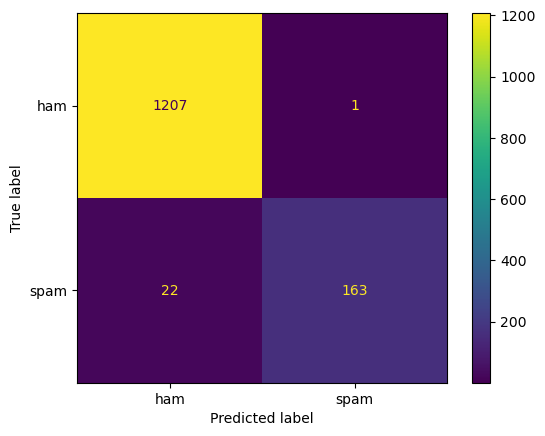

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [64]:
### RBF --> 0.9798994974874372
### Linear --> 0.9834888729361091
### Poly --> 0.9361091170136396
### Sigmoid --> 0.9806173725771715

### Prediction on unseen data

In [67]:
f=open('sample.csv')
f

<_io.TextIOWrapper name='sample.csv' mode='r' encoding='cp1252'>

In [68]:
data = f.readlines()
data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a Â£1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [69]:
tfidf.transform(data)

<3x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [70]:
svm.predict(tfidf.transform(data))

array(['ham', 'spam', 'ham'], dtype=object)

### Serialize the objects

In [71]:
import joblib

In [72]:
# will create binary file:

joblib.dump(svm,'classifiler.model')

['classifiler.model']

In [73]:
joblib.dump(svm,'preprocessor.model')

['preprocessor.model']